# Clasificación del conjunto de datos MNIST con redes neuronales
Este cuaderno muestra un ejemplo de ajuste de redes neuronales para el conjunto de datos MNIST.

In [1]:
# Librerías importantes
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.layers import Dense, Flatten
from keras.layers import Conv2D, MaxPooling2D

## Lectura de datos
El conjunto de datos MNIST está disponible en la librería Keras.

In [2]:
# Lectura del contjunto de datos MNIST. Los datos de entrenamiento y prueba ya están separados, 
# por lo que no es necesario hacer una división adicional.
from keras.datasets import mnist
(X, y), (X_test, y_test) = mnist.load_data()

X = X.astype('float32') / 255.0
X = X.reshape(-1, 28*28)
y = to_categorical(y, num_classes=10)

X_test = X_test.astype('float32') / 255.0
X_test = X_test.reshape(-1, 28*28)

y_test = to_categorical(y_test, num_classes=10)

print("Forma de X:", X.shape)
print("Forma de y:", y.shape)
print("Forma de X_test:", X_test.shape)
print("Forma de y_test:", y_test.shape)


Forma de X: (60000, 784)
Forma de y: (60000, 10)
Forma de X_test: (10000, 784)
Forma de y_test: (10000, 10)


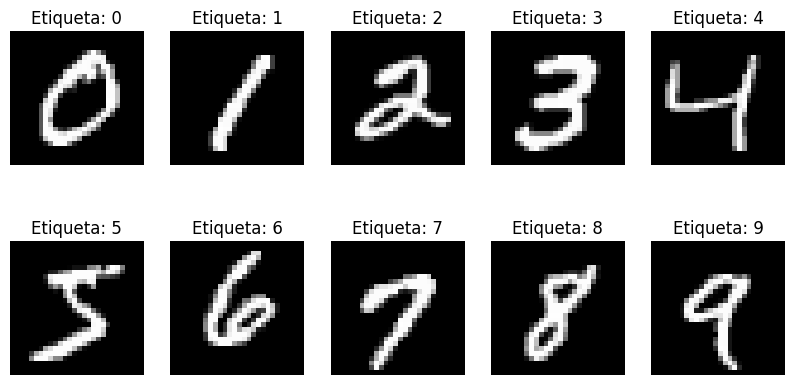

In [3]:
# Muestra una imagen de cada categoría
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i in range(10):
    ax = axes[i // 5, i % 5]
    idx = np.where(np.argmax(y, axis=1) == i)[0][0]
    ax.imshow(X[idx].reshape(28, 28), cmap='gray')
    ax.set_title(f"Etiqueta: {i}")
    ax.axis('off')


## Clasificación con un MLP

In [4]:
# Define la función que crea el modelo MLP
def create_mlp(input_dim, num_classes):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=input_dim))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [7]:
# Compila y entrena el modelo con los datos de entrenamiento
mlp_model = create_mlp(input_dim=28*28, num_classes=10)
mlp_model.summary() 
mlp_model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9207 - loss: 0.2689 - val_accuracy: 0.9579 - val_loss: 0.1390
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9633 - loss: 0.1183 - val_accuracy: 0.9675 - val_loss: 0.1062
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9750 - loss: 0.0804 - val_accuracy: 0.9693 - val_loss: 0.1003
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9817 - loss: 0.0584 - val_accuracy: 0.9700 - val_loss: 0.1059
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9841 - loss: 0.0476 - val_accuracy: 0.9710 - val_loss: 0.0972
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9879 - loss: 0.0374 - val_accuracy: 0.9711 - val_loss: 0.1029
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9900 - loss: 0.0308 - val_accuracy: 0.9743 - val_loss: 0.1031
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9914 - loss: 0.0253 - 

In [8]:
# Evalúa el modelo con los datos de prueba
y_pred = mlp_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
print(classification_report(y_true_classes, y_pred_classes))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 871us/step
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.98      0.98      1135
           2       0.97      0.98      0.97      1032
           3       0.97      0.98      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.98      0.97      0.97       892
           6       0.99      0.98      0.98       958
           7       0.99      0.96      0.97      1028
           8       0.95      0.98      0.97       974
           9       0.95      0.98      0.96      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



## Entrena una CNN para el conjunto de datos MNIST

In [ ]:
# Prepara los datos para la CNN, tanto los de entrenamiento como los de prueba
X_cnn = X.reshape(-1, 28, 28, 1)
X_test_cnn = X_test.reshape(-1, 28, 28, 1)

y_cat = to_categorical(y, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

print("Forma de X para CNN:", X_cnn.shape)
print("Forma de X_test para CNN:", X_test_cnn.shape)


Forma de X para CNN: (60000, 28, 28, 1)
Forma de X_test para CNN: (10000, 28, 28, 1)


In [10]:
# Genera la función que crea el modelo CNN
def create_cnn(input_shape, num_classes):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model    

In [11]:
# Compila y entrena la CNN con los datos de entrenamiento
cnn_model = create_cnn(input_shape=(28, 28, 1), num_classes=10)
cnn_model.summary() 
cnn_model.fit(X_cnn, y, epochs=10, batch_size=32, validation_split=0.2)


c:\Users\L03117947\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9505 - loss: 0.1610 - val_accuracy: 0.9819 - val_loss: 0.0619
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9847 - loss: 0.0499 - val_accuracy: 0.9852 - val_loss: 0.0510
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9851 - val_loss: 0.0498
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9922 - loss: 0.0252 - val_accuracy: 0.9873 - val_loss: 0.0453
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9937 - loss: 0.0198 - val_accuracy: 0.9866 - val_loss: 0.0472
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9893 - val_loss: 0.0389
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9963 - loss: 0.0117 - val_accuracy: 0.9860 - val_loss: 0.0560
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9970 - loss: 0.0099 

In [13]:
# Evalúa la CNN con los datos de prueba
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_classes_cnn = np.argmax(y_pred_cnn, axis=1)
print(classification_report(y_true_classes, y_pred_classes_cnn))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       1.00      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

